In [1]:
from  urllib.request import urlretrieve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
urlretrieve(url, 'fremont.csv')

('fremont.csv', <http.client.HTTPMessage at 0x7f8fac406150>)

In [3]:
!head -n 6 fremont.csv

Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,13,4,9
10/03/2012 01:00:00 AM,10,4,6
10/03/2012 02:00:00 AM,2,1,1
10/03/2012 03:00:00 AM,5,2,3
10/03/2012 04:00:00 AM,7,6,1


In [4]:
cols = ["Date", "Fremont Bridge East Sidewalk", "Fremont Bridge West Sidewalk"]
data = pd.read_csv('fremont.csv', index_col='Date', parse_dates=True, usecols=cols)

In [5]:
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


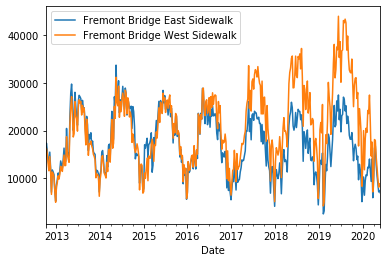

In [6]:
data.resample('W').sum().plot()

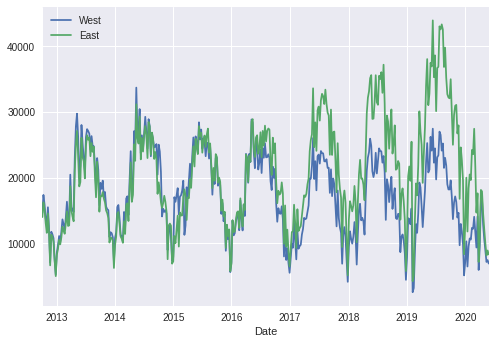

In [7]:
plt.style.use('seaborn')
data.columns = ['West', 'East']
data.resample('W').sum().plot()

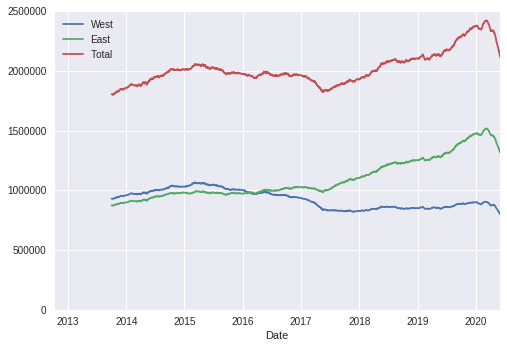

In [8]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot()

ax.set_ylim(0, None);

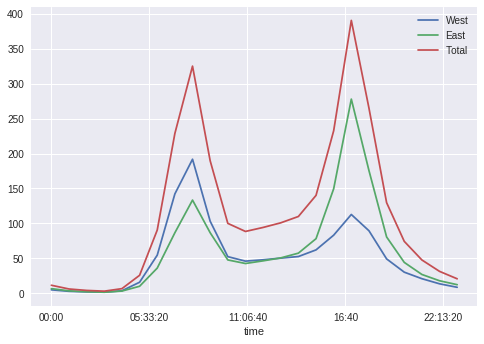

In [9]:
data.groupby(data.index.time).mean().plot();

In [10]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


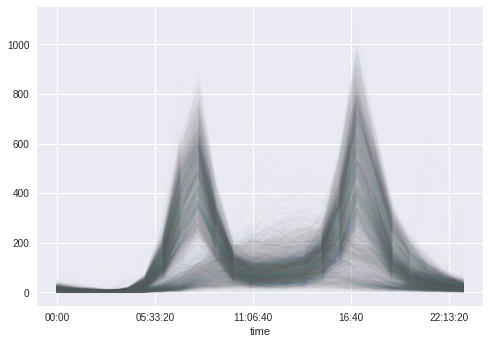

In [11]:
pivoted.plot(legend=False, alpha=0.01);